# CODE FOR CUSTOMER SEGMENTATION
# SCALING 

In [2]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
from datetime import datetime 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import pairwise_distances_argmin
import os


In [3]:
directory = 'C:\\Users\\koutsik\\Desktop\\Customer_segmentation'
df= pd.read_csv(directory+'\\data2.csv',sep=',')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\koutsik\\Desktop\\Customer_segmentation\\data2.csv'

# Aggregate the data in order to calculate the key variables

In [5]:
# use groupby to aggregate sales by CustomerID
customer_df = df.groupby('user_id').agg({'basket': sum, 
                                            'order_id': lambda x: x.nunique()})

# Select the columns we want to use
customer_df.columns = ['TotalSales', 'OrderCount'] 

# create a new column 'AvgOrderValue'
customer_df['AvgOrderValue'] = customer_df['TotalSales'] / customer_df['OrderCount']
#customer_df.head()

NameError: name 'df' is not defined

# Normalize the data

In [4]:
rank_df = customer_df.rank(method='first')
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
normalized_df.head(10)

NameError: name 'customer_df' is not defined

# Elbow method

In [1]:
X = customer_df[['TotalSales','OrderCount','AvgOrderValue']].values
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(4,clustering_score[3], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

NameError: name 'customer_df' is not defined

# Interpreting Customer Segments

In [287]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_



In [288]:
#Extract cluster centres
cluster1_metrics = kmeans.cluster_centers_[0]
cluster2_metrics = kmeans.cluster_centers_[1]
cluster3_metrics = kmeans.cluster_centers_[2]
cluster4_metrics = kmeans.cluster_centers_[3]

data = [cluster1_metrics, cluster2_metrics, cluster3_metrics,cluster4_metrics] 
cluster_center_df = pd.DataFrame(data)

cluster_center_df.columns = four_cluster_df.columns[0:3]
cluster_center_df

,TotalSales,OrderCount,AvgOrderValue
0,-0.004650,-0.833545,0.973786
1,1.167031,0.888537,0.761187
2,0.430221,0.999258,-0.831280
3,-1.232158,-0.686479,-0.849011


## Plots

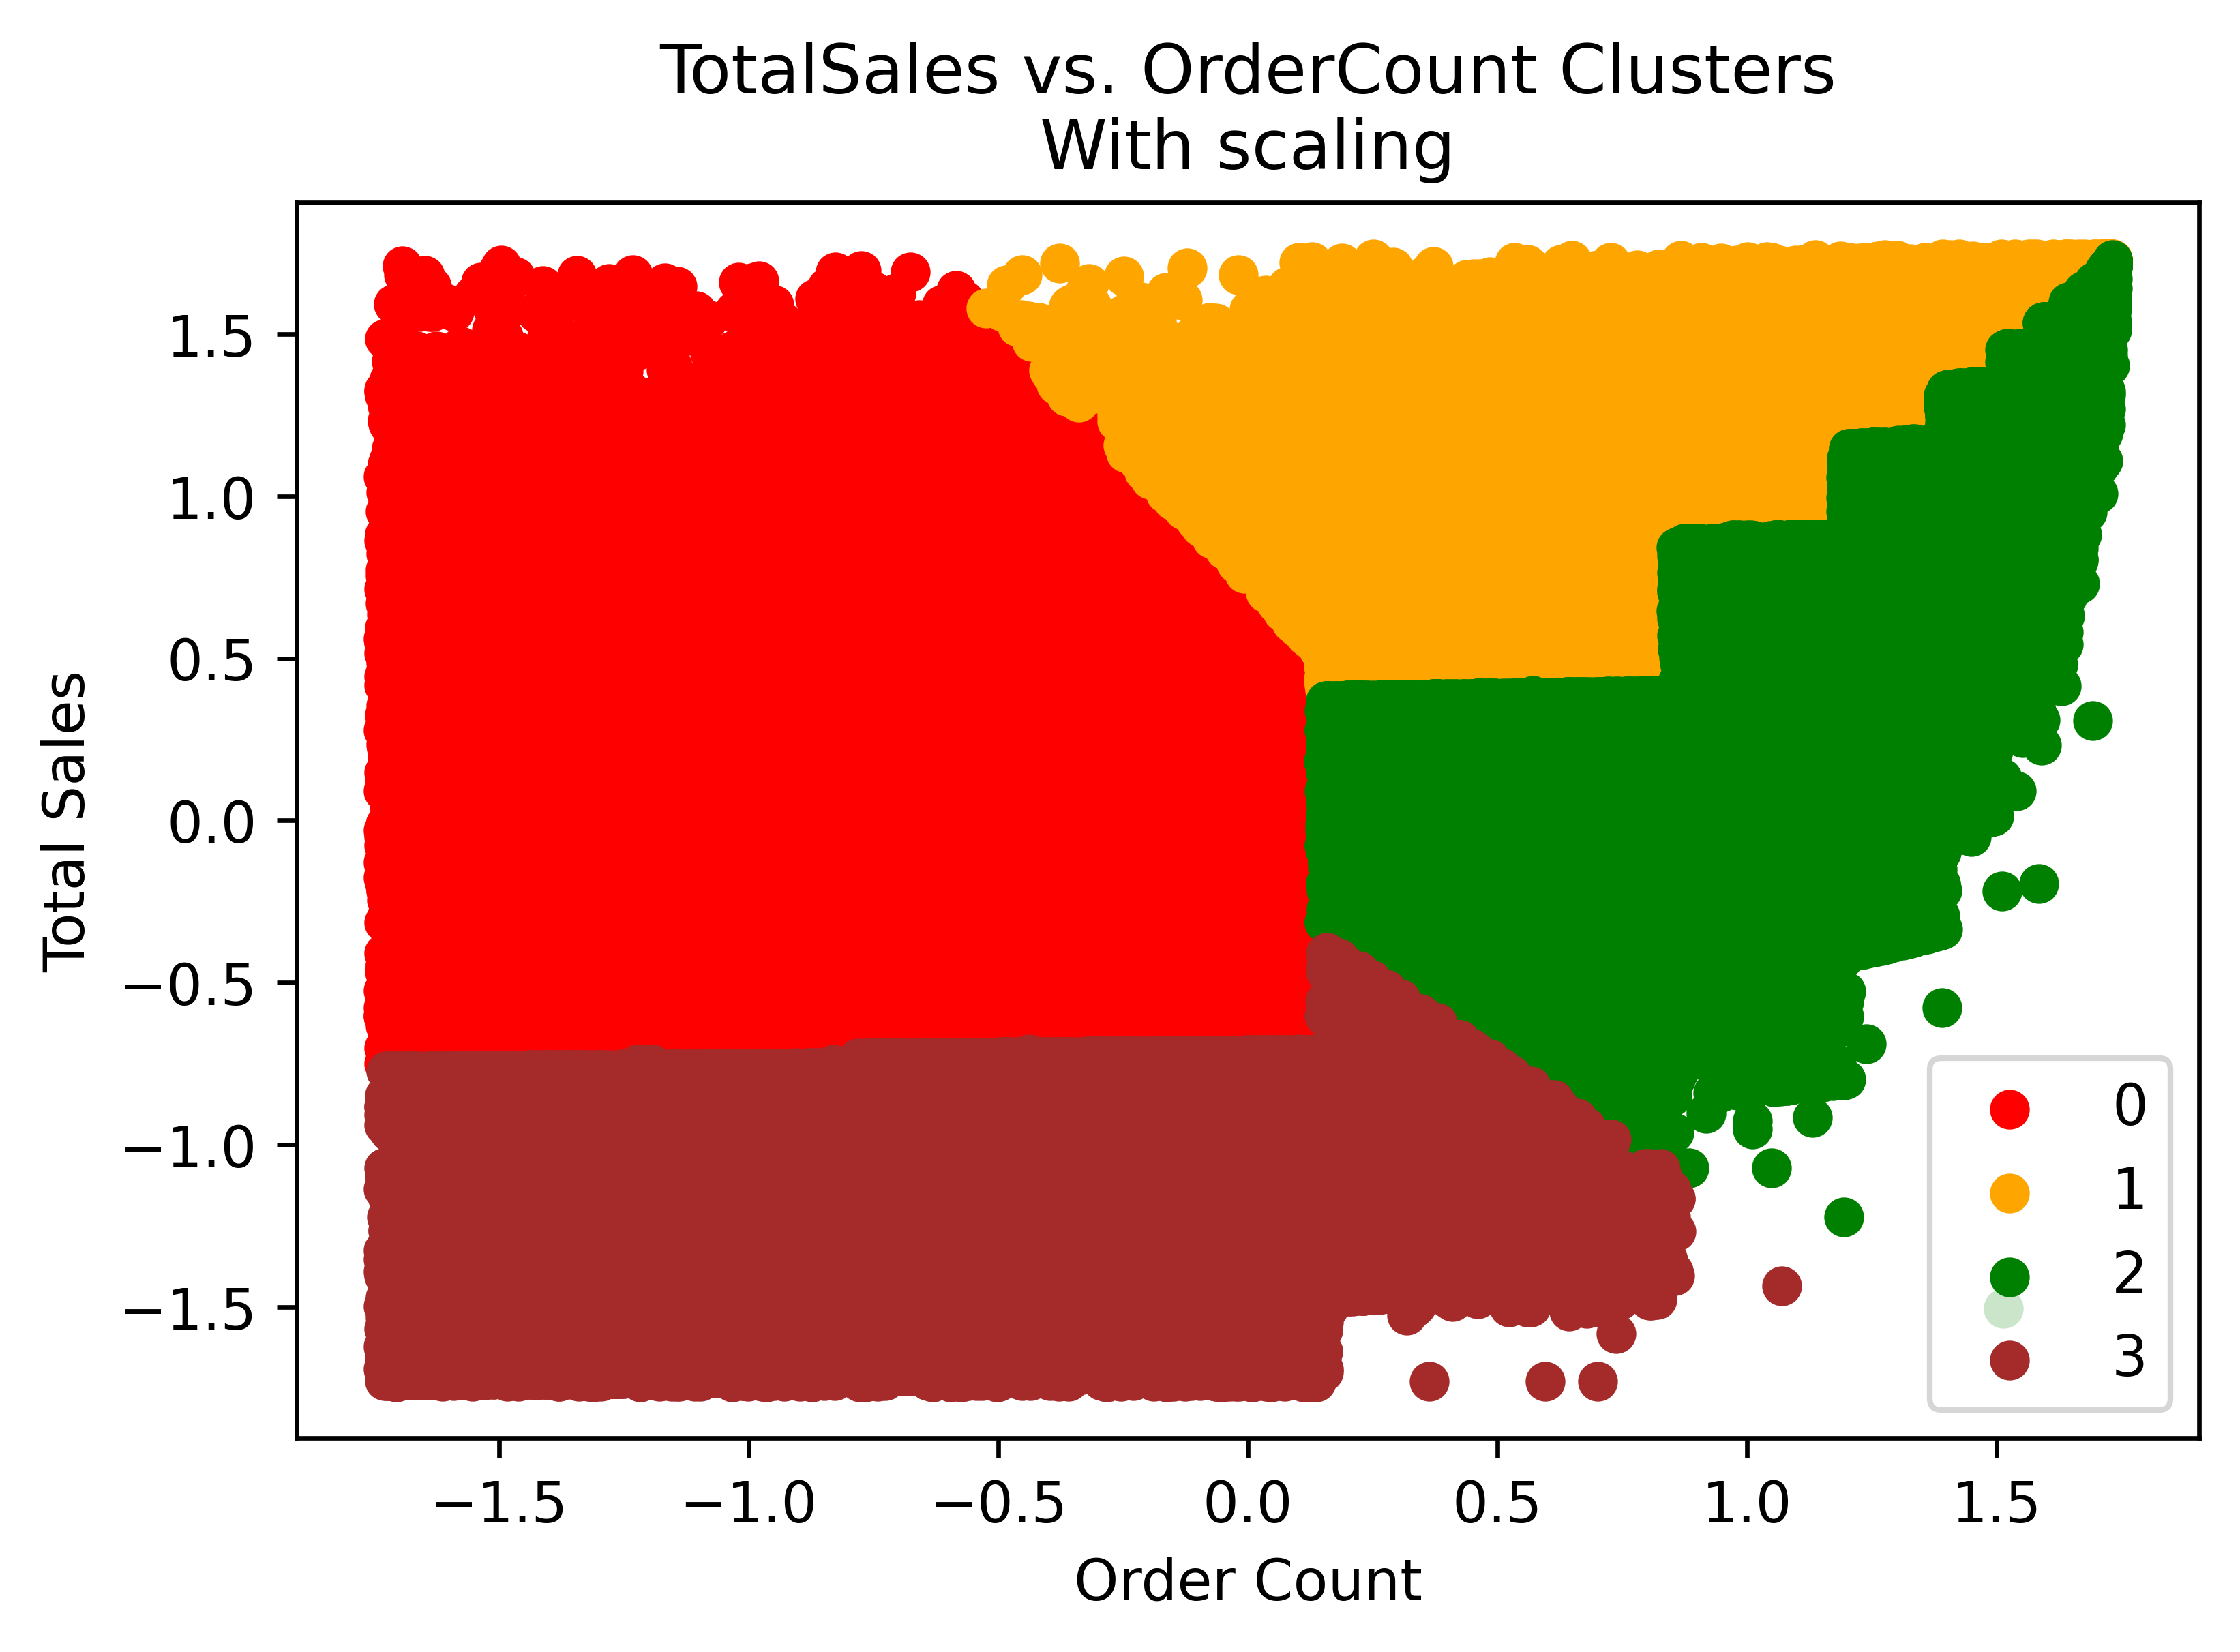

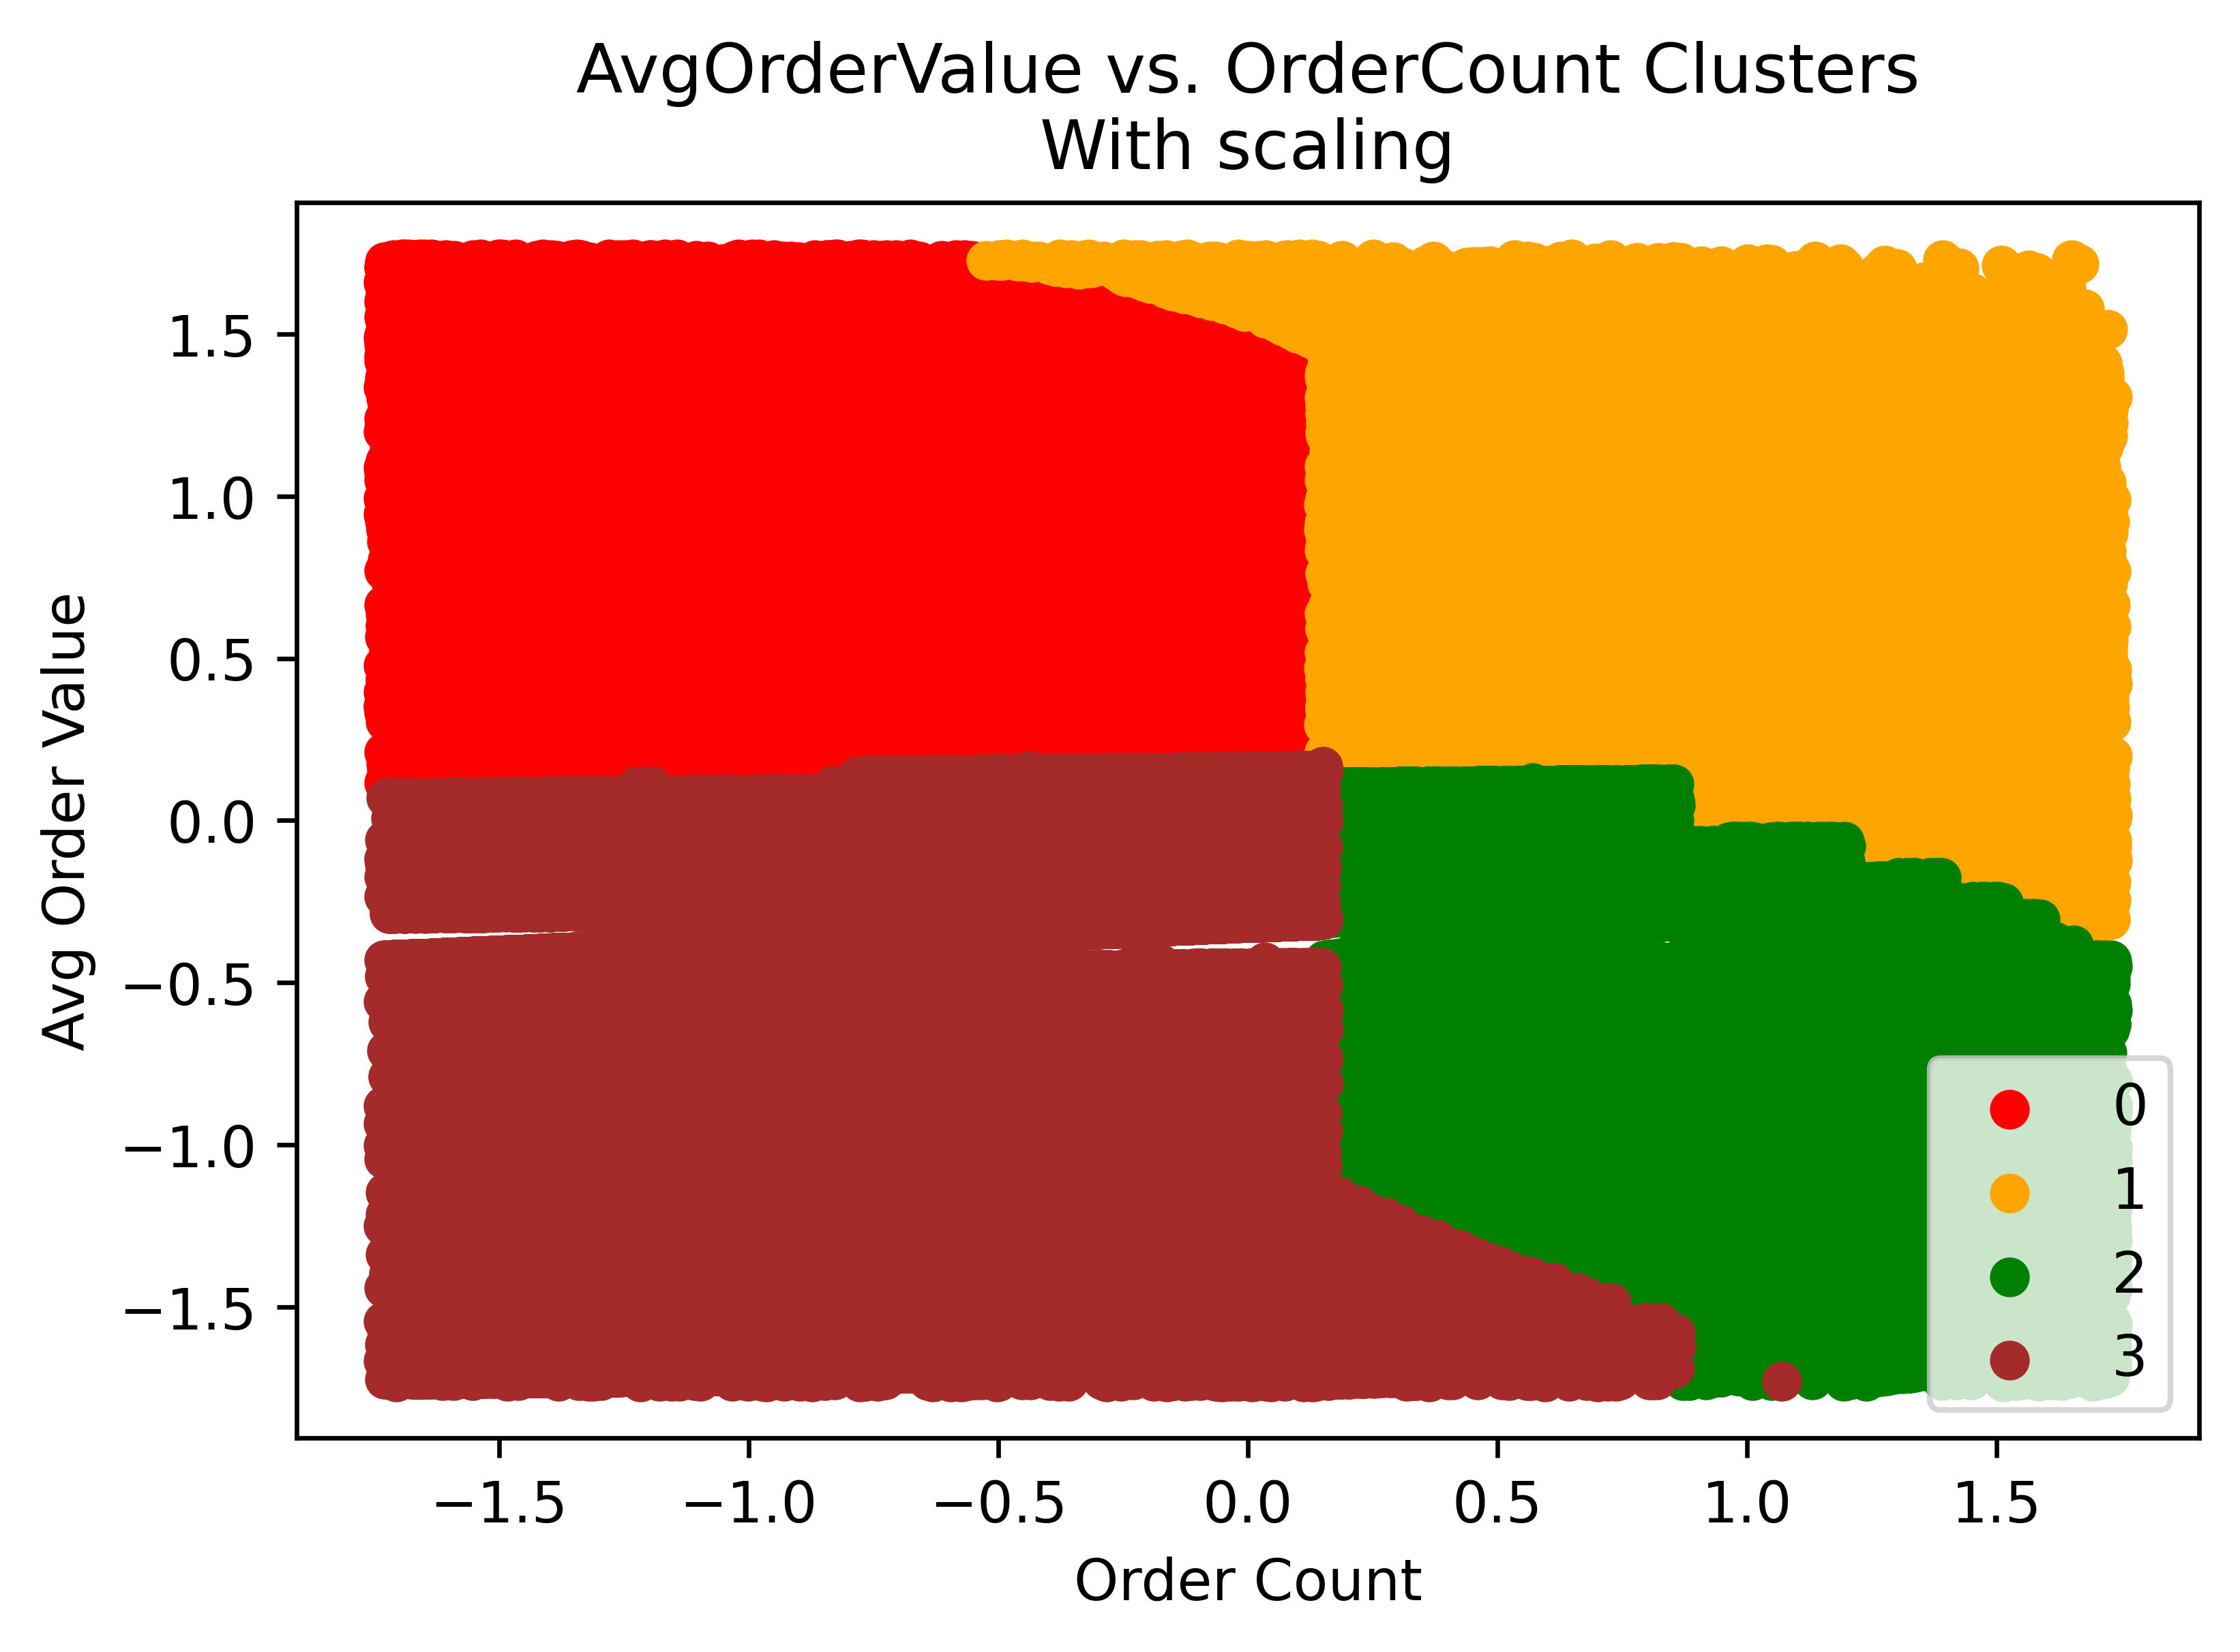

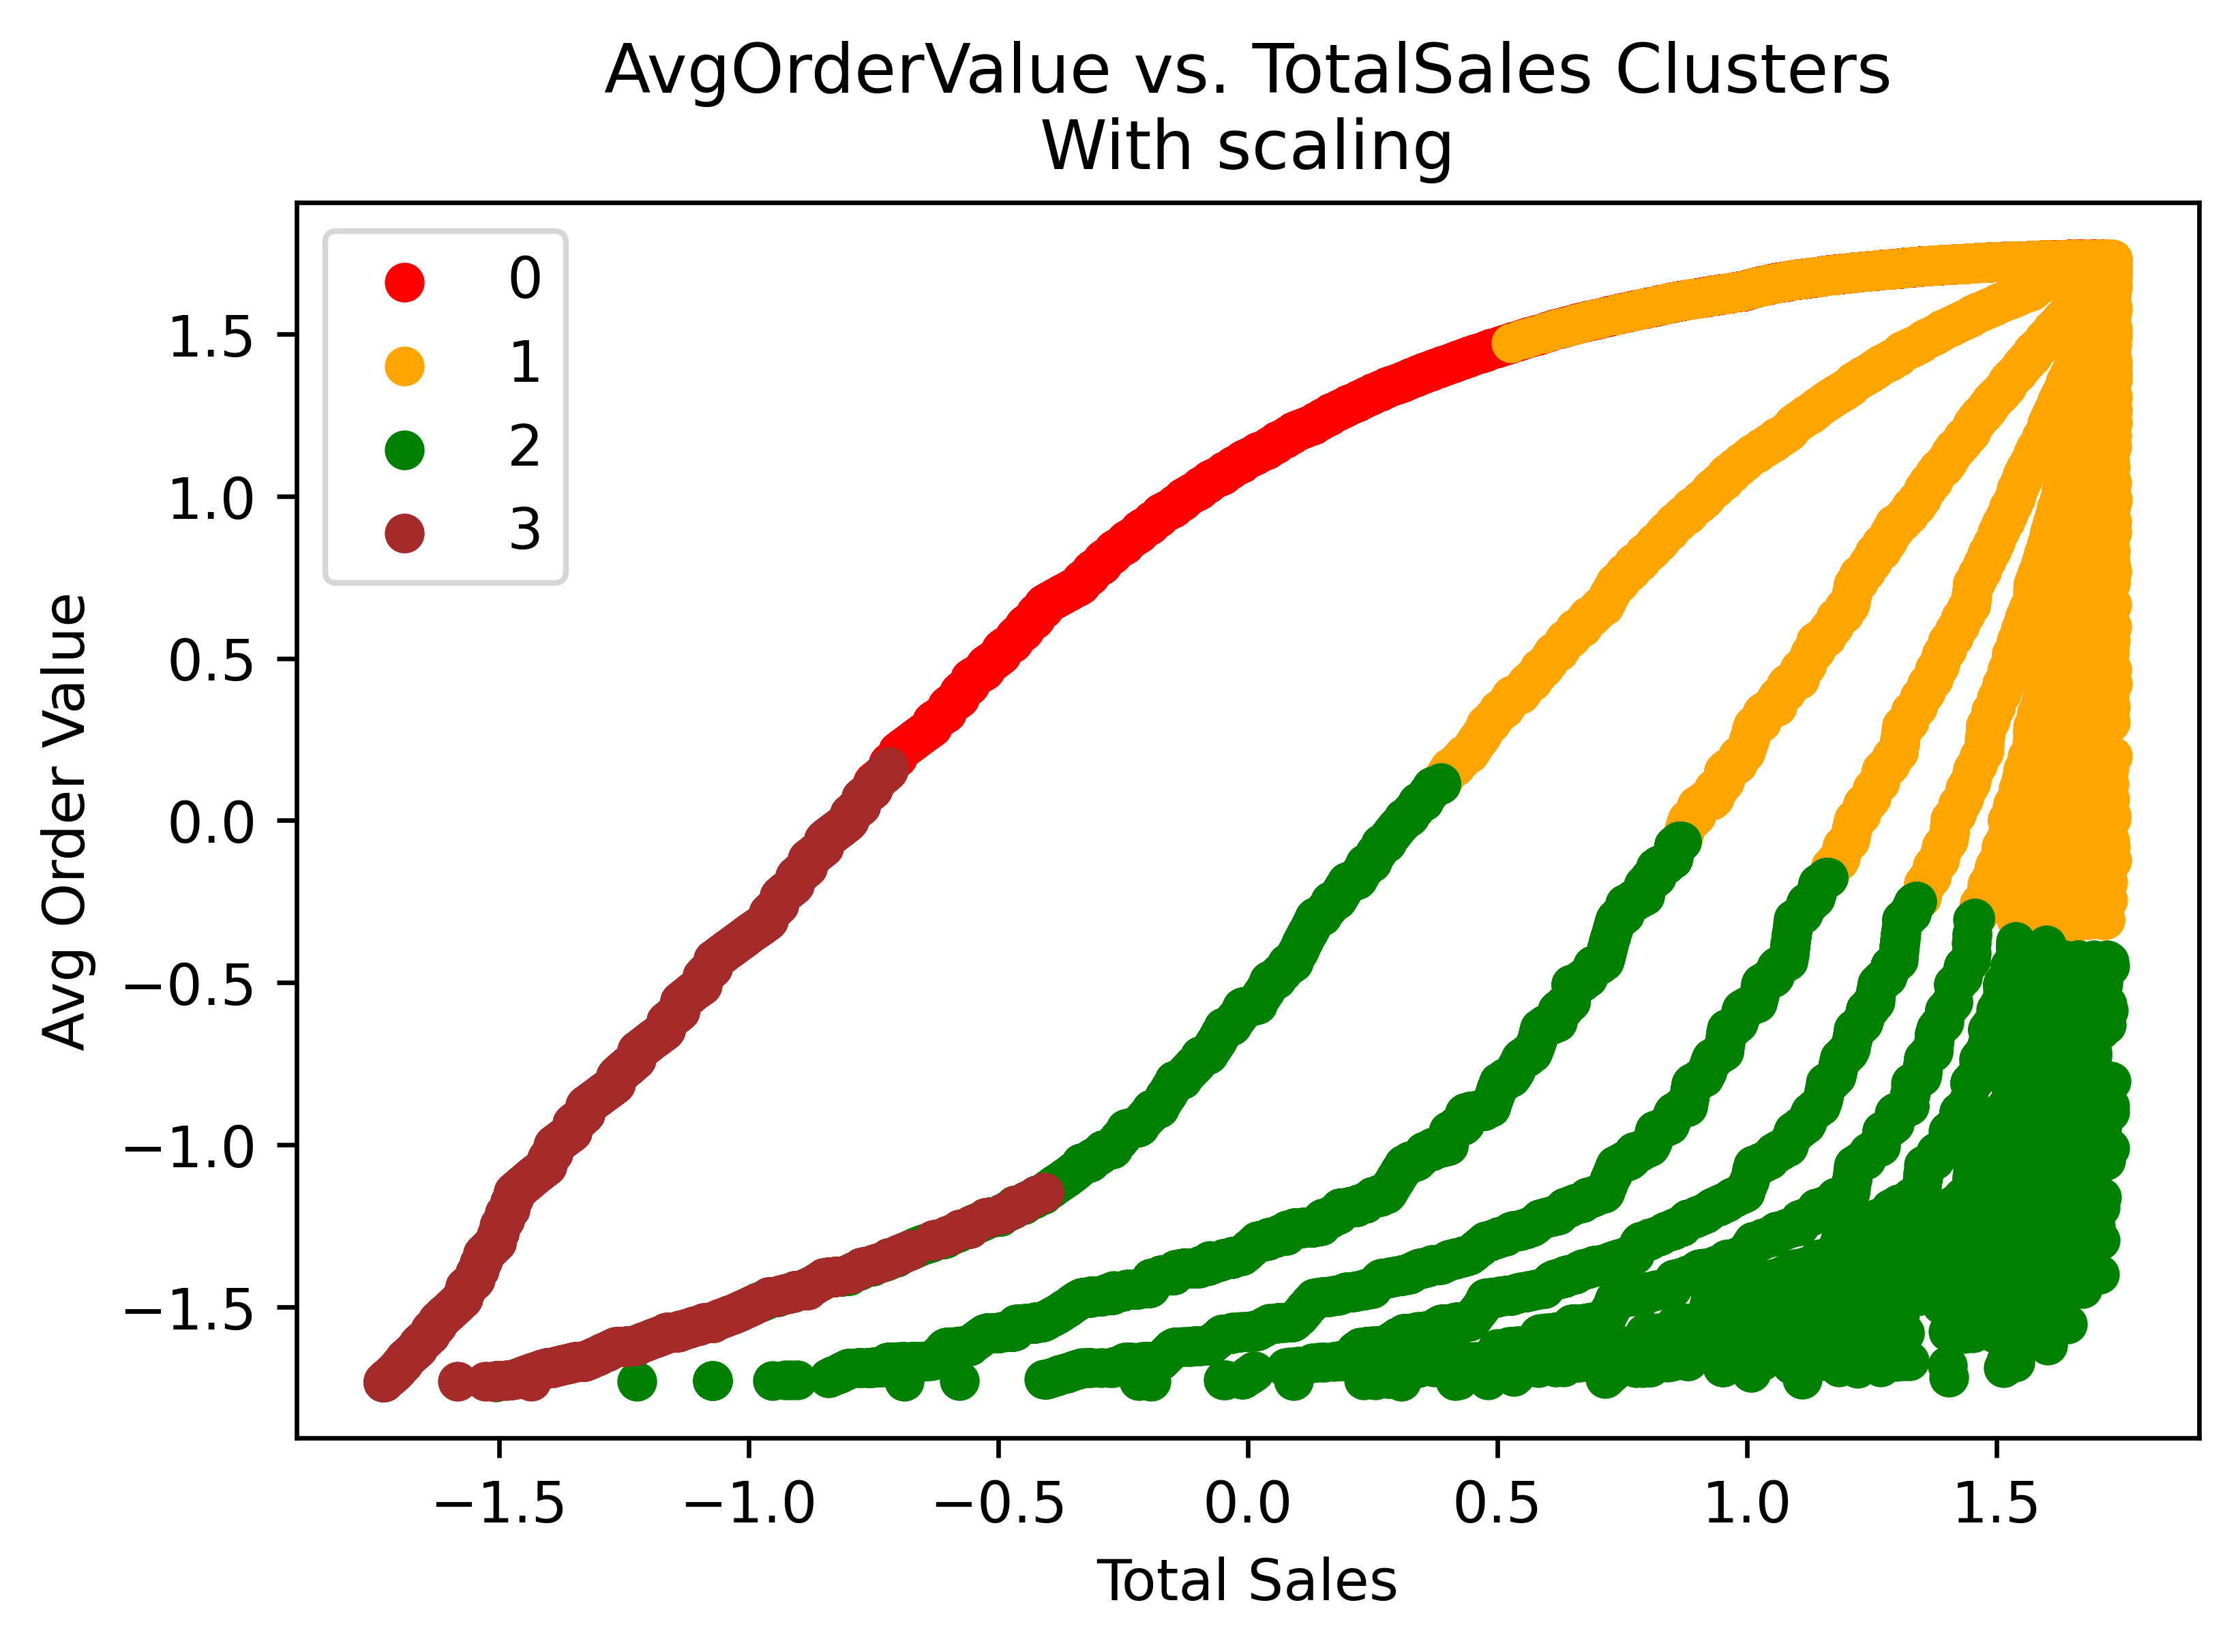

In [289]:


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='red',label='0')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='orange',label='1')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='green',label='2')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='brown',label='3')

plt.title('TotalSales vs. OrderCount Clusters\nWith scaling')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')
plt.legend(loc='lower right')
plt.grid(False)
plt.savefig('sales_order_with_scaling')
plt.show()

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='red',label='0')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='orange',label='1')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='green',label='2')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='brown',label='3')




plt.title('AvgOrderValue vs. OrderCount Clusters\nWith scaling')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')
plt.legend(loc='lower right')
plt.grid(False)
plt.savefig('avg_value_order_with_scaling')
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
  c='red',label='0')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
  c='orange',label='1')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
     c='green',label='2')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
     c='brown',label='3')


plt.legend()
plt.title('AvgOrderValue vs. TotalSales Clusters\nWith scaling')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid(False)
plt.savefig('avg_value_sales_with_scaling')
plt.show()
